<a href="https://colab.research.google.com/github/C-mklain/Diamonds_Price_Regression/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\nUploaded file: {filename}")
    diamonds = pd.read_csv(filename)

print("\nPreview of the dataset:")
diamonds.head()


Saving diamonds.csv to diamonds (2).csv

Uploaded file: diamonds (2).csv

Preview of the dataset:


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


diamonds = pd.read_csv('/content/diamonds.csv')
diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Missing values per column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Dataset shape: (53940, 11)

Summary statistics:
          Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x  

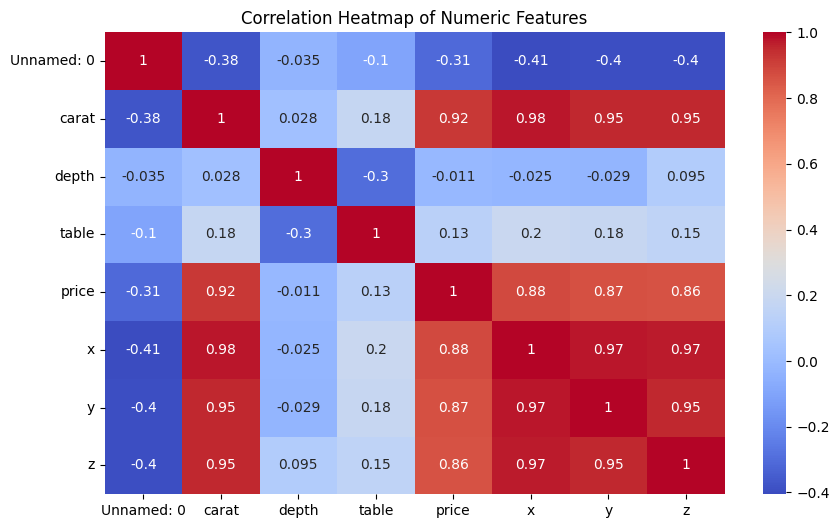


1. Carat shows a strong positive correlation with price.
2. Depth and table have weak correlation with price.
3. Categorical features (cut, color, clarity) likely influence price indirectly.



(12500, 11)

In [11]:

print("Missing values per column:\n", diamonds.isnull().sum())

diamonds.drop_duplicates(inplace=True)

print("\nDataset shape:", diamonds.shape)
print("\nSummary statistics:\n", diamonds.describe())

plt.figure(figsize=(10,6))
sns.heatmap(diamonds.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

print("""
1. Carat shows a strong positive correlation with price.
2. Depth and table have weak correlation with price.
3. Categorical features (cut, color, clarity) likely influence price indirectly.
""")

diamonds_model = diamonds.sample(12500, random_state=42)
diamonds_model.shape


In [12]:

diamonds_encoded = pd.get_dummies(diamonds_model, columns=['cut', 'color', 'clarity'], drop_first=True)

X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R²: {lr_r2:.4f}")


Linear Regression RMSE: 1100.41
Linear Regression R²: 0.9237


In [13]:

continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(diamonds_model[continuous_features])

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_continuous)


pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['price'] = diamonds_model['price'].values

X_pca = pca_df[['PC1', 'PC2']]
y_pca = pca_df['price']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)

pca_rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
pca_r2 = r2_score(y_test_pca, y_pred_pca)

print(f"PCA + Linear Regression RMSE: {pca_rmse:.2f}")
print(f"PCA + Linear Regression R²: {pca_r2:.4f}")


PCA + Linear Regression RMSE: 1756.03
PCA + Linear Regression R²: 0.8056


In [14]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Ridge RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.4f}")
print(f"Lasso RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.4f}")


Ridge RMSE: 1102.00, R²: 0.9234
Lasso RMSE: 1100.16, R²: 0.9237


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.269e+09, tolerance: 1.577e+07
  model = cd_fast.enet_coordinate_descent(



Model Performance Comparison:
                     Model         RMSE        R²
3                    Lasso  1100.155422  0.923688
0        Linear Regression  1100.409446  0.923653
2                    Ridge  1102.001579  0.923432
1  PCA + Linear Regression  1756.027478  0.805577


/tmp/ipython-input-2048186241.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Model', y='R²', palette='viridis')


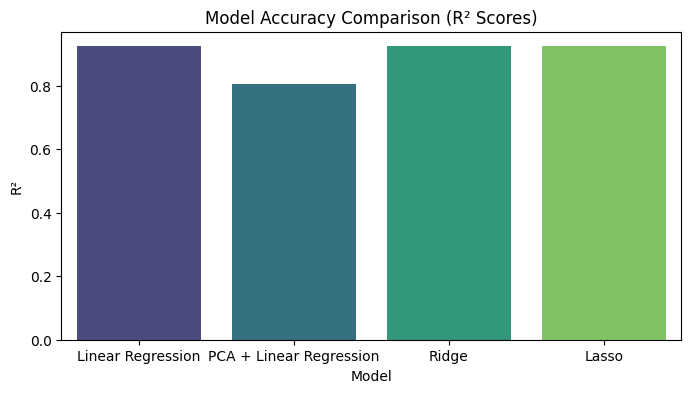


 Likely Explanation:
Ridge Regression typically achieves the best performance because 
it minimizes overfitting by penalizing large coefficient values 
without removing important predictors, thus improving generalization.



In [15]:


comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'PCA + Linear Regression', 'Ridge', 'Lasso'],
    'RMSE': [lr_rmse, pca_rmse, ridge_rmse, lasso_rmse],
    'R²': [lr_r2, pca_r2, ridge_r2, lasso_r2]
})

print("\nModel Performance Comparison:")
print(comparison.sort_values(by='R²', ascending=False))

plt.figure(figsize=(8,4))
sns.barplot(data=comparison, x='Model', y='R²', palette='viridis')
plt.title("Model Accuracy Comparison (R² Scores)")
plt.show()

print("""
 Likely Explanation:
Ridge Regression typically achieves the best performance because
it minimizes overfitting by penalizing large coefficient values
without removing important predictors, thus improving generalization.
""")
